Number of qubits in Tweedledum circuit: 21
                                                                          »
__a20 : ──────────────────────────────────────────────────────────────────»
                                                                          »
__a19 : ──────────────────────────────────────────────────────────────────»
                                                                          »
__a18 : ──────────────────────────────────────────────────────────────────»
                                                                          »
__a17 : ──────────────────────────────────────────────────────────────────»
                                                                          »
__a16 : ──────────────────────────────────────────────────────────────────»
                                                                          »
__a15 : ──────────────────────────────────────────────────────────────────»
                                             

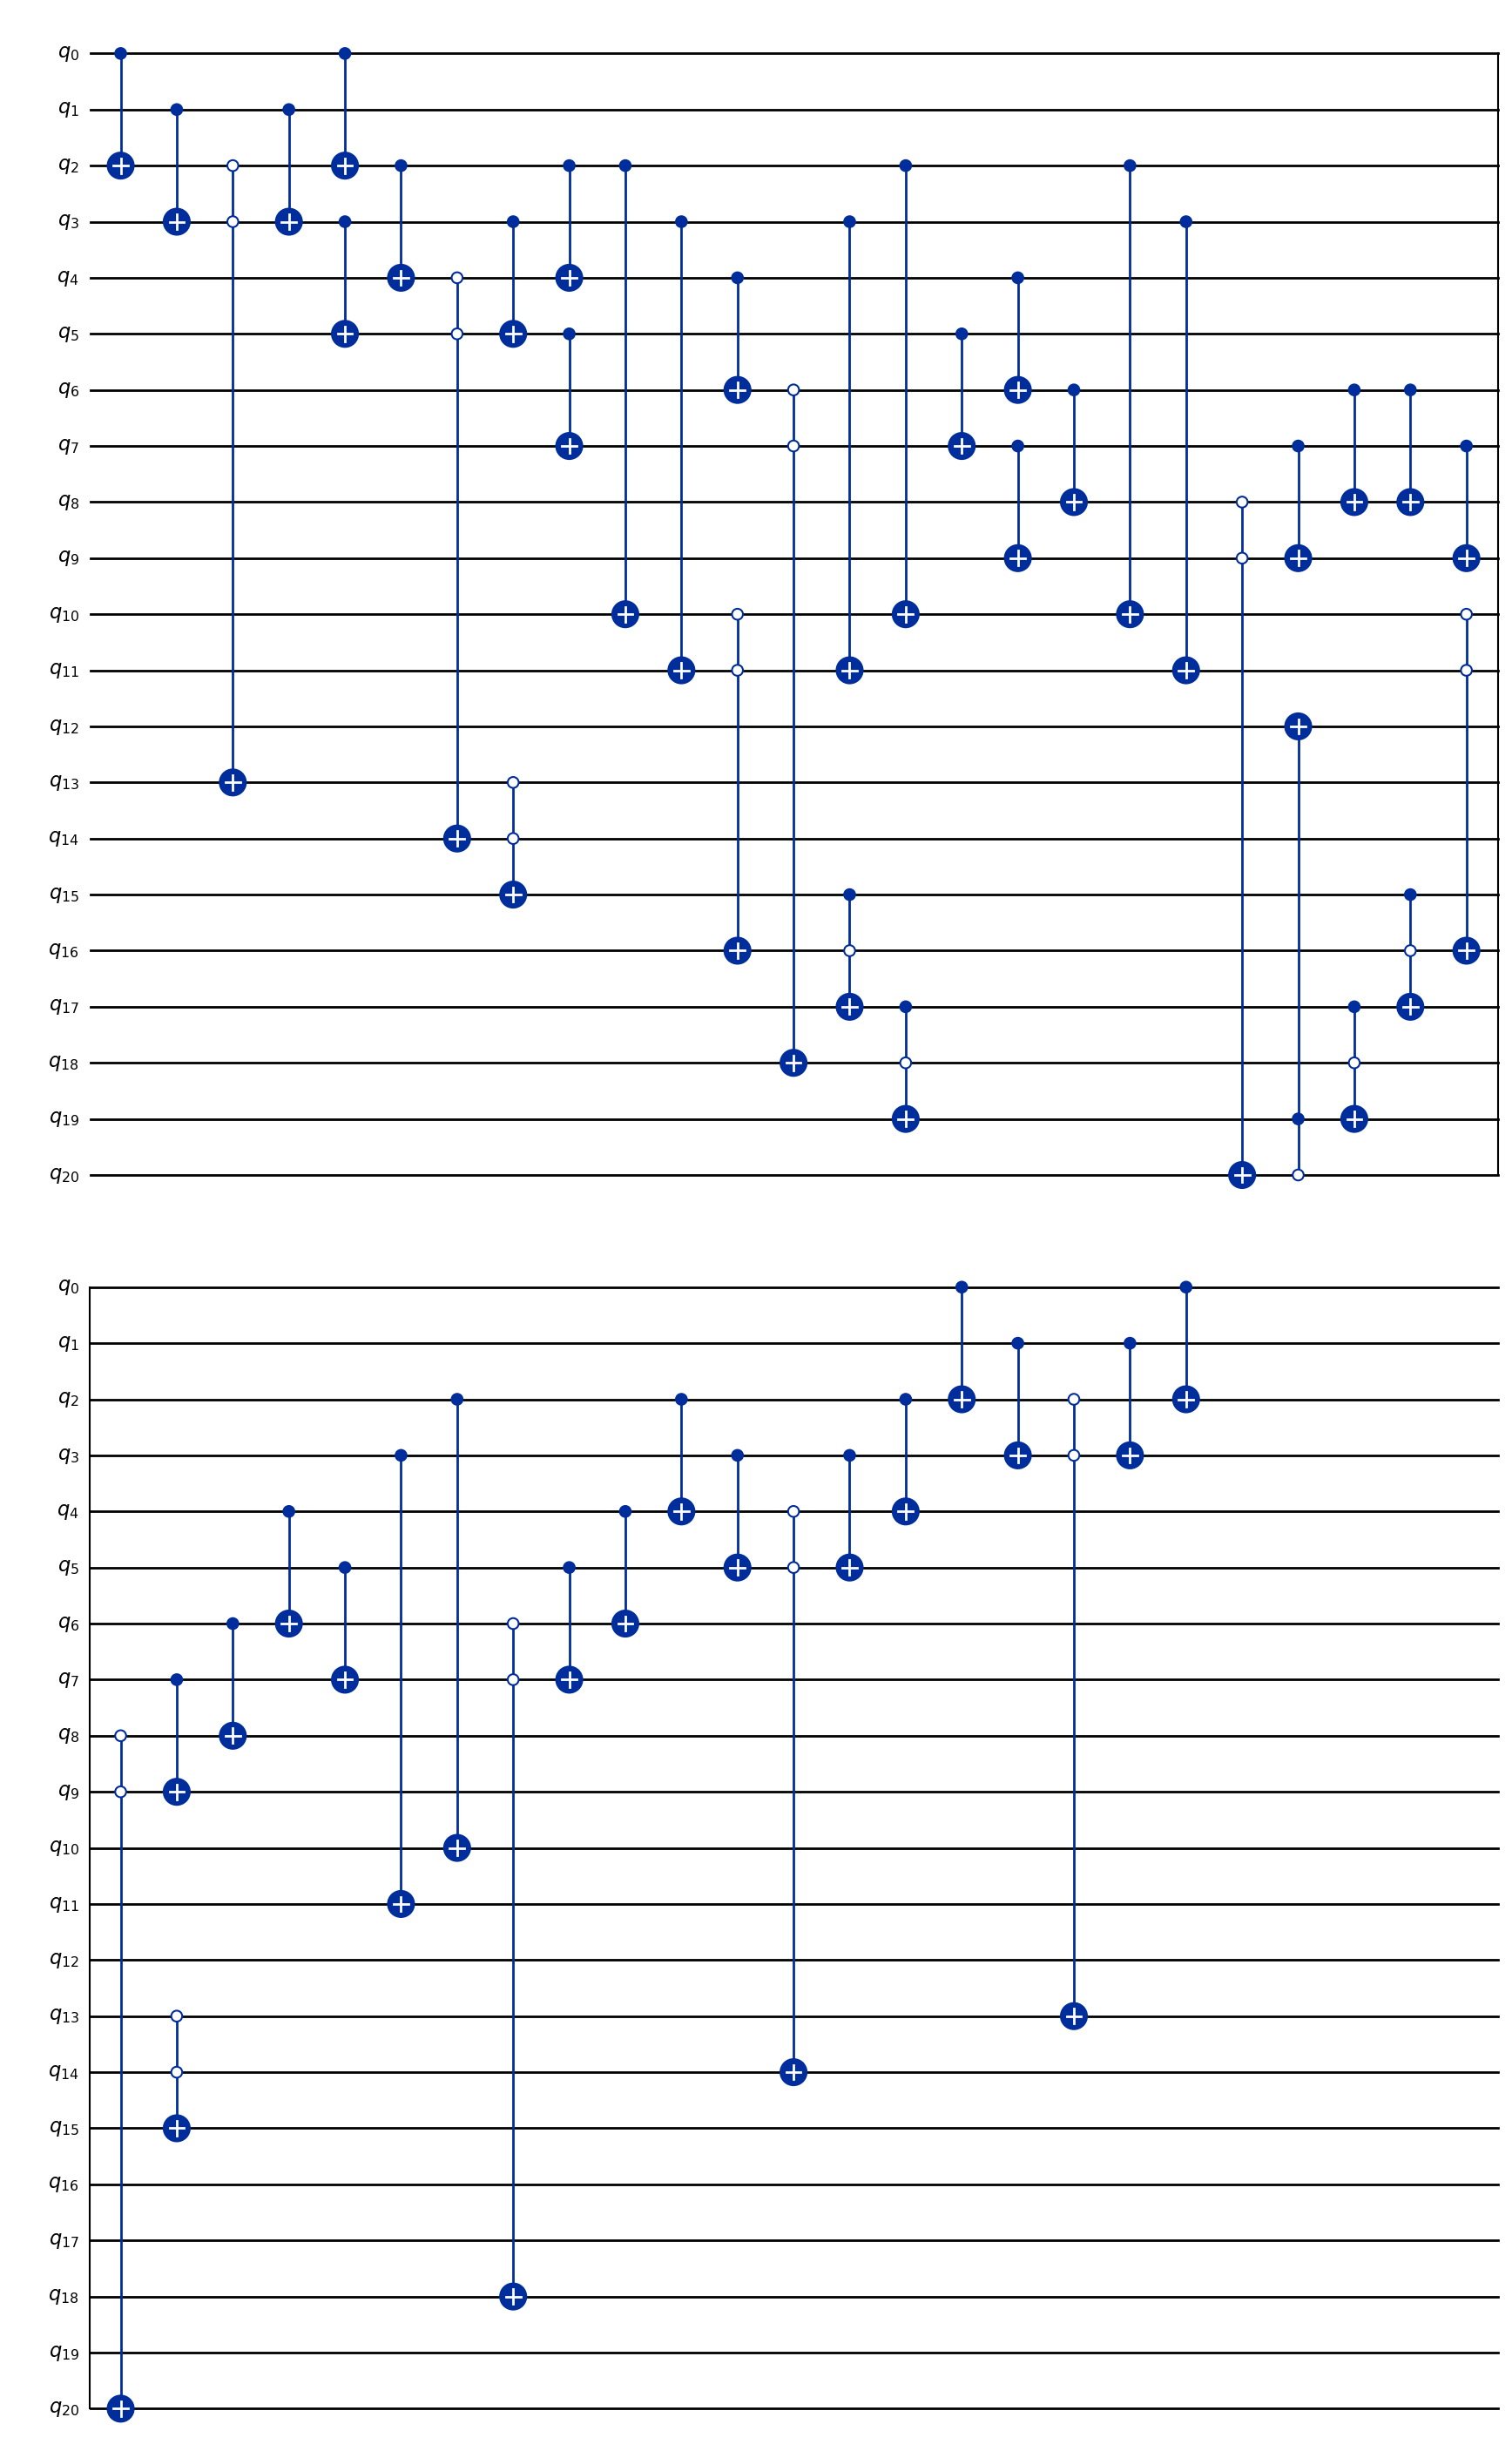

In [2]:
from tweedledum.synthesis import xag_synth  # Import XAG synthesis
from tweedledum.qiskit import *
from tweedledum.bool_function_compiler.bool_function import BoolFunction

def xag_synthesizer(cf):
    """Custom synthesizer using XAG synthesis instead of PKRM""" 

    # Get the LogicNetwork object from cf.network
    logic_network = cf._logic_network
    
    # Perform XAG synthesis ONCE and store the result
    tweedledum_circuit = xag_synth(logic_network)
    print(f"Number of qubits in Tweedledum circuit: {tweedledum_circuit.num_qubits()}")
    print(tweedledum_circuit)
    qc_qiskit = to_qiskit(tweedledum_circuit, circuit_type="gatelist")

    return qc_qiskit

expression = "((v0_0 ^ v1_0) | (v0_1 ^ v1_1)) & ((v1_0 ^ v2_0) | (v1_1 ^ v2_1)) & ((v1_0 ^ v5_0) | (v1_1 ^ v5_1)) & ((v2_0 ^ v3_0) | (v2_1 ^ v3_1)) & ((v3_0 ^ v4_0) | (v3_1 ^ v4_1))"
variables = ['v0_0', 'v0_1', 'v1_0', 'v1_1', 'v2_0', 'v2_1', 'v3_0', 'v3_1', 'v4_0', 'v4_1', 'v5_0', 'v5_1']
grover_oracle_func = BoolFunction.from_expression(expression=expression, var_order=variables)
oracle = xag_synthesizer(grover_oracle_func)
oracle.draw(output='mpl')